#### To predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location



In [64]:
import numpy as np
import pandas as pd 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline       
# load the training dataset
real_estate_data = pd.read_csv('real_estate.csv')
real_estate_data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


**The data consists of the following variables:**

- transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- house_age - the house age (in years)
- mtransit_distance - the distance to the nearest light rail station (in meters)
- local_convenience_stores - the number of convenience stores within walking distance
- latitude - the geographic coordinate, latitude
- longitude - the geographic coordinate, longitude
- price_per_unit house price of unit area (3.3 square meters)

In [42]:
real_estate_data.shape #shows the number of row and column

(414, 7)

In [43]:
real_estate_data.size

2898

In [44]:
# To check for missing values for each features in the dataset
real_estate_data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [53]:
 # summarizes the dataset for each numeric features
numeric_features = ['house_age', 'transit_distance', 'latitude', 'longitude']
real_estate_data[numeric_features + ['price_per_unit']].describe() 

,house_age,transit_distance,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,37.980193
std,11.392485,1262.109595,0.012410,0.015347,13.606488
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,9.025000,289.324800,24.963000,121.528085,27.700000
50%,16.100000,492.231300,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,25.014590,121.566270,117.500000


The highest price for a 3.3 square meters is 117.50000 while the lowest price is 7.60000.
The average house_age is 17.7yrs and the highest is 43.80yrs

In [46]:
real_estate_data.info() # shows the data type, count, missing data for each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [47]:
# Change the object datatype to category
real_estate_data["transaction_date"] = real_estate_data["transaction_date"].astype("category")
real_estate_data["local_convenience_stores"] = real_estate_data["local_convenience_stores"].astype("category")


# Check the datatype
real_estate_data.dtypes



transaction_date            category
house_age                    float64
transit_distance             float64
local_convenience_stores    category
latitude                     float64
longitude                    float64
price_per_unit               float64
dtype: object

#### Data visualization to understand the distibution of numerical features using boxplot , histogram

<ipython-input-37-44d9ae1cc8fc>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


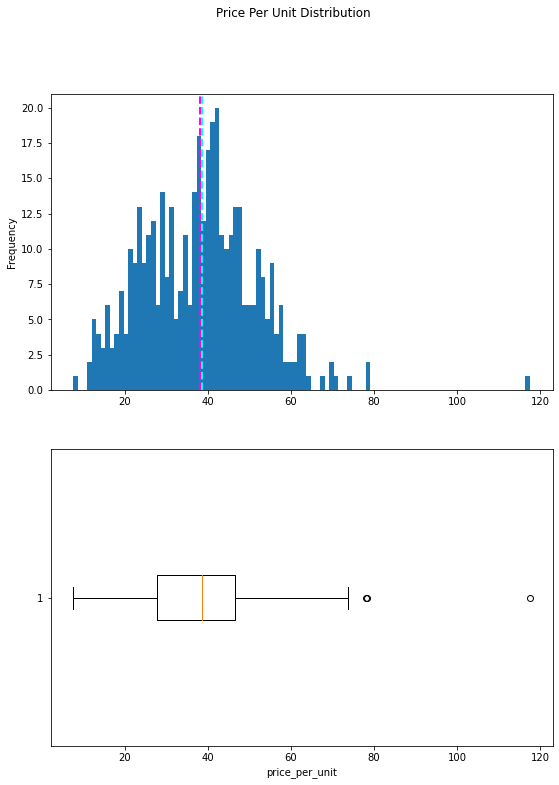

In [37]:
# Get the label column
label = real_estate_data['price_per_unit']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('price_per_unit')

# Add a title to the Figure
fig.suptitle('Price Per Unit Distribution')

# Show the figure
fig.show()

For the price_per_unit data, the mean and median close to the middle of the minimum and maximum(75), at around 40, while the price_per_unit  at about 80 & 120 are outliers because they are out of the range of most of the data. The boxplot shows that half prices per_unit are between 25 and 45 the remaining prices per unit are between 0-22 & 45-80.

#### Remove outliers and re-plot

<ipython-input-65-299c57e8bfaf>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


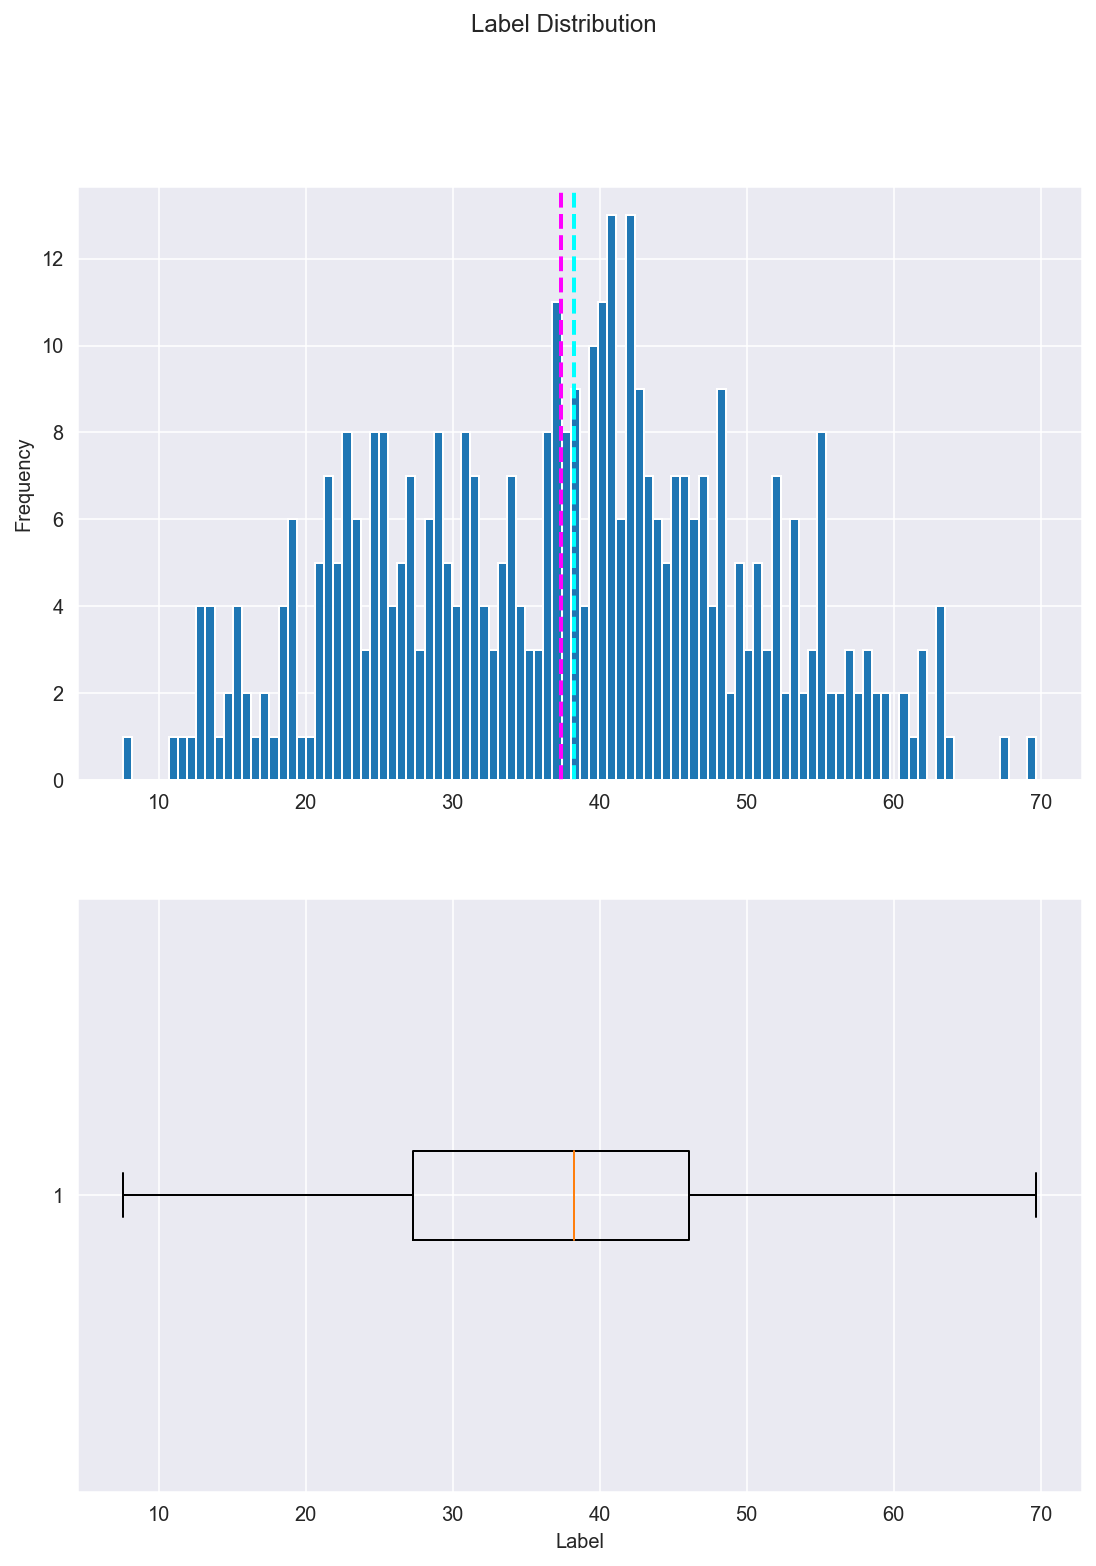

In [65]:
real_estate_data = real_estate_data[real_estate_data['price_per_unit']<70]
# Get the label column
label = real_estate_data[real_estate_data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

#### visualization of data distribution for numerical and categorical features

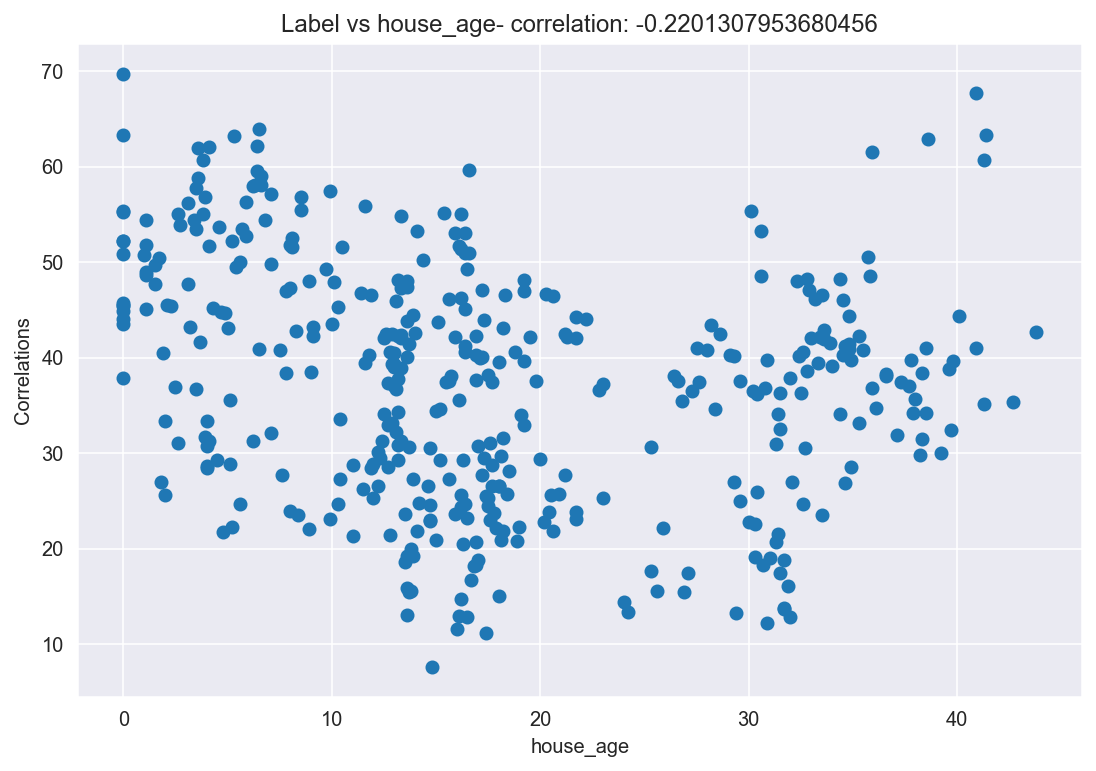

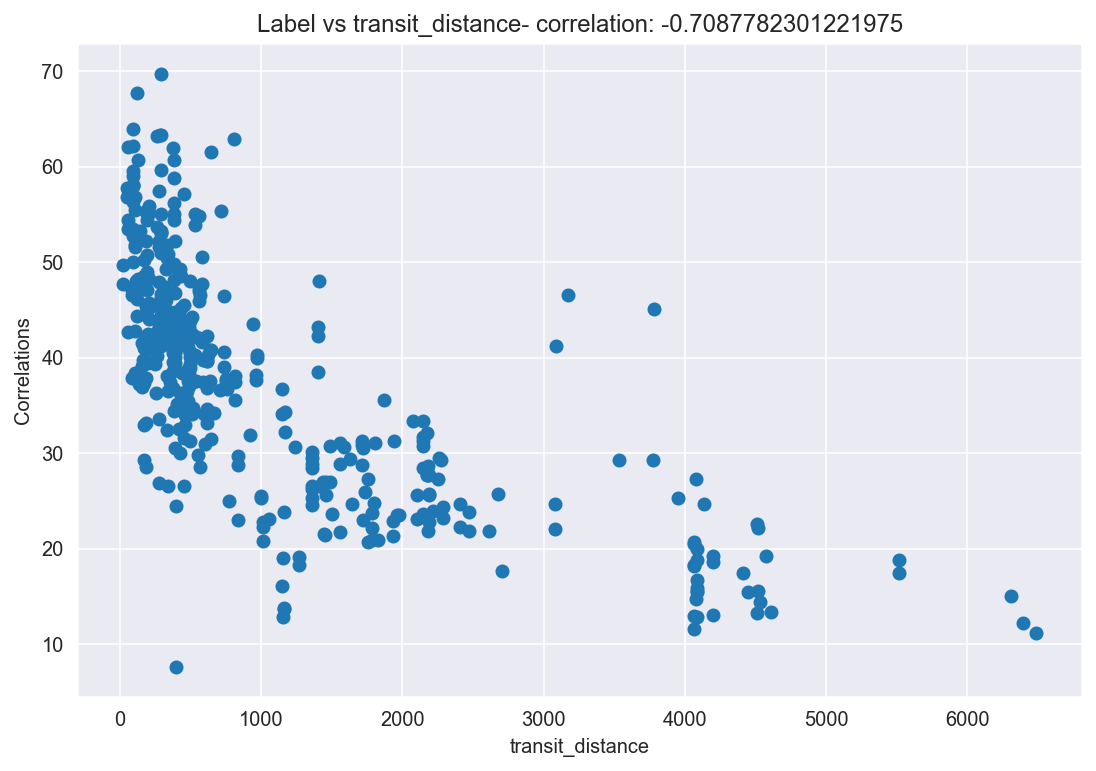

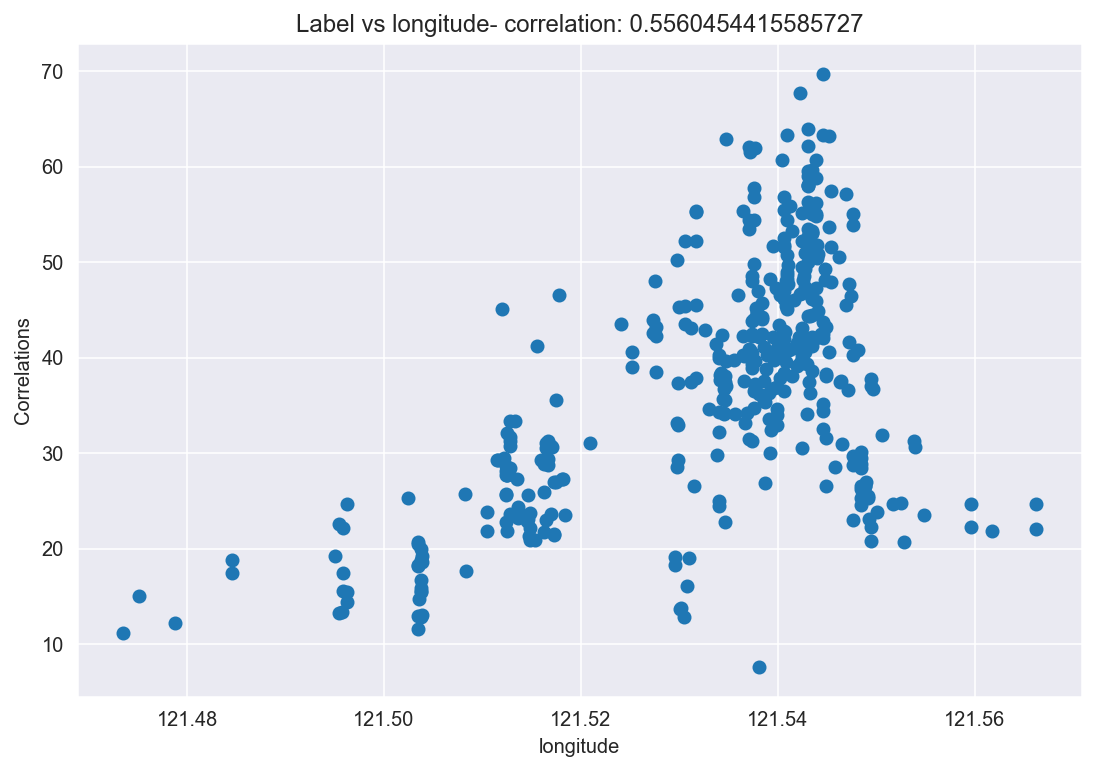

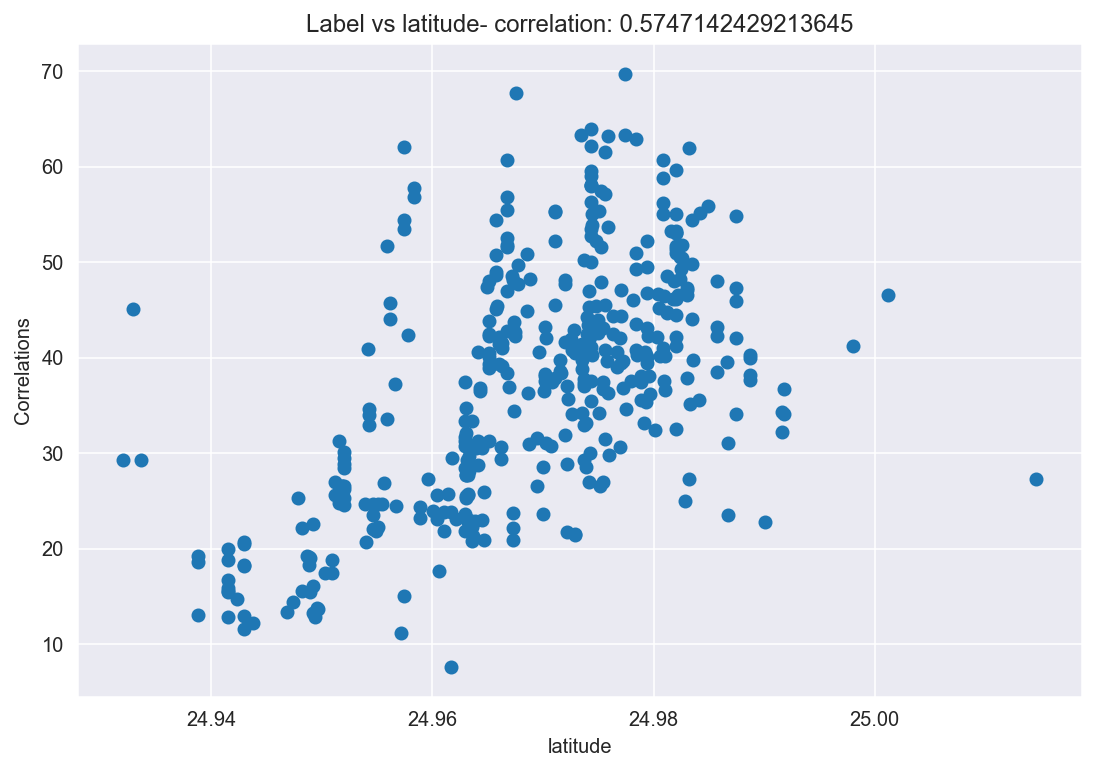

In [59]:
for col in real_estate_data[['house_age', 'transit_distance', 'longitude', 'latitude']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = real_estate_data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()






The scatter plot shows price_per_unit has a postive relationship with latitiude & longtitude which increased with increase in the price_per_unit. House_age & transit_distance show a strong negative realtionship with price_per_unit this means the highern the house_age & transit_distance the lower the price_per_unit of the houses

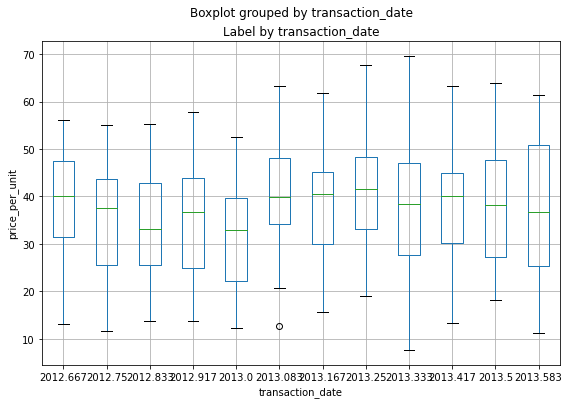

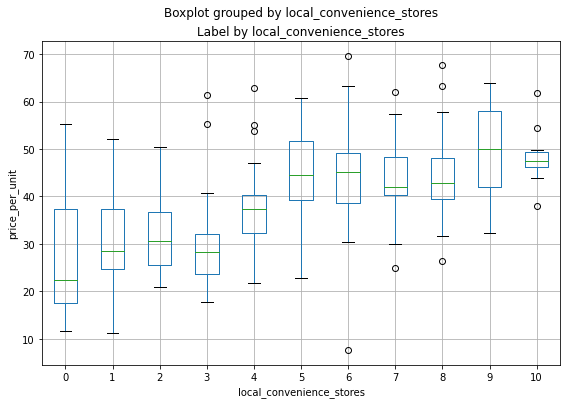

In [79]:
# plot a boxplot for the label by each categorical feature
for col in real_estate_data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("price_per_unit")
plt.show()

The presence of 9 (local_convenience_stores) has the highest price_per_unit, followed by 5 (local_conveneience_stores)

#### Correlation matrices to check for linear relationships between vaiables

<AxesSubplot:>

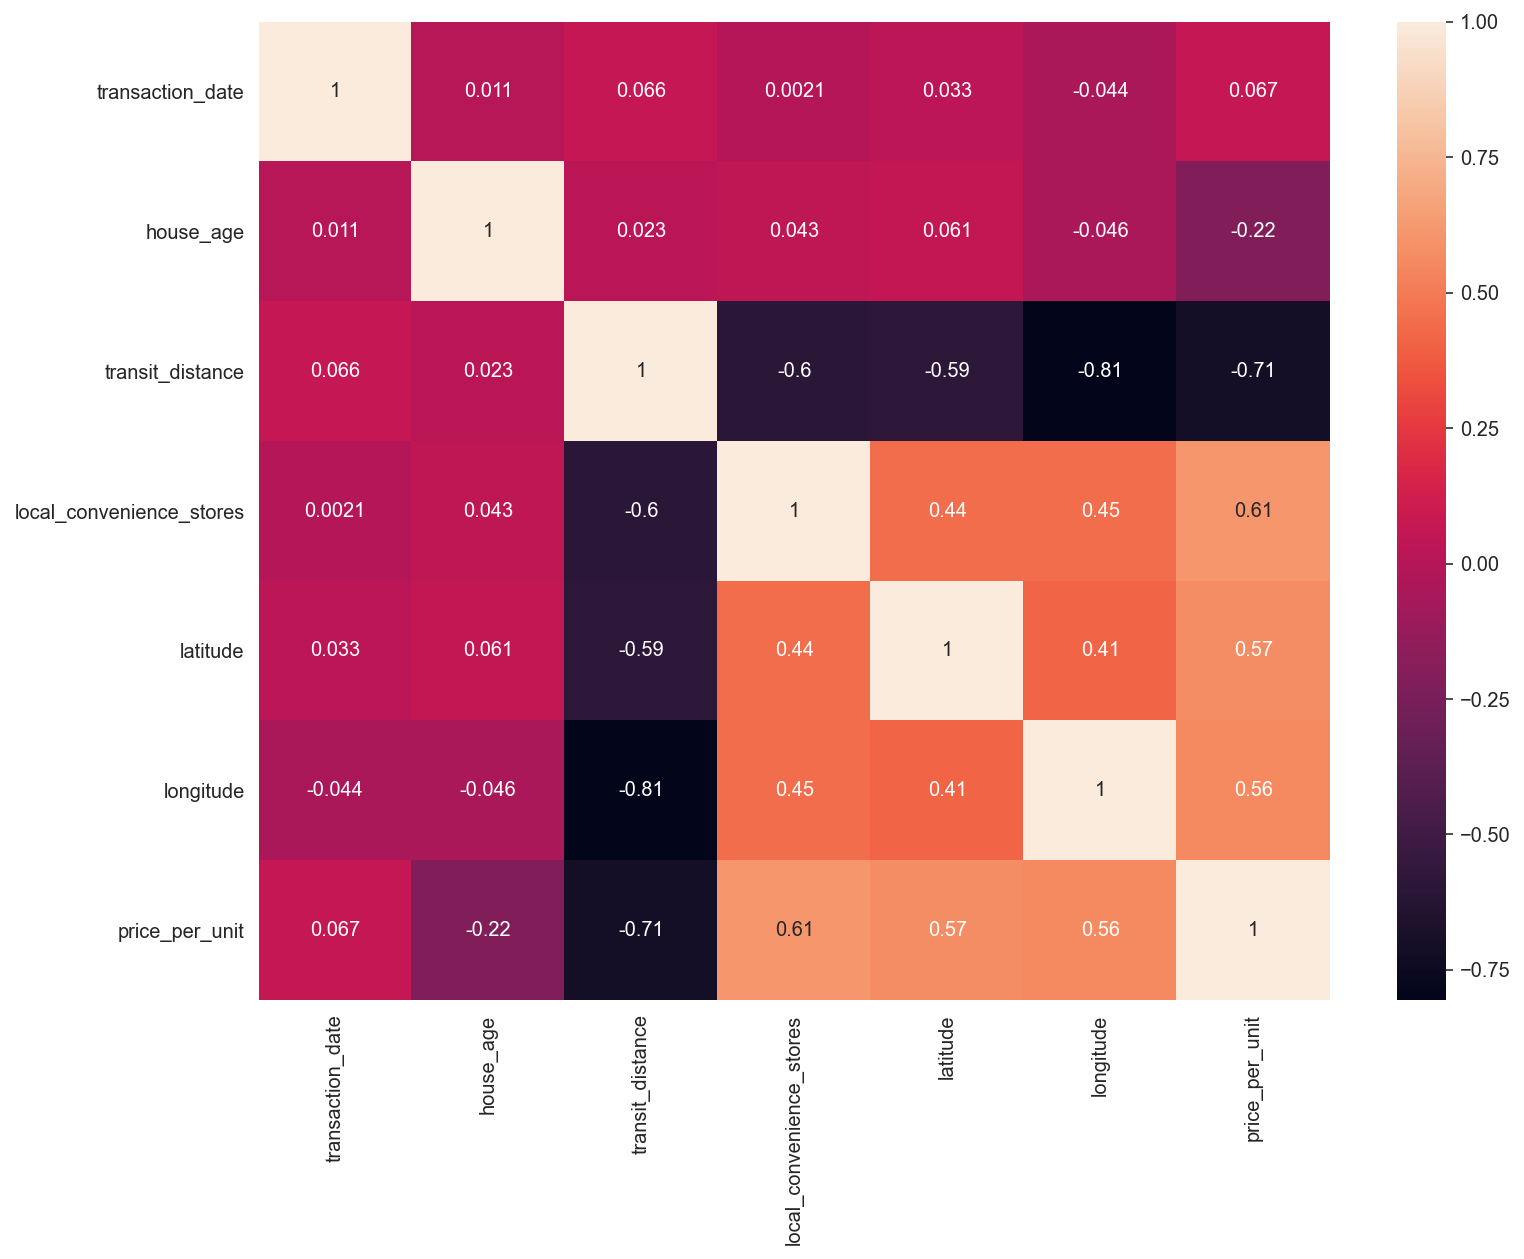

In [66]:
plt.subplots(figsize = (12, 9))
sns.heatmap(real_estate_data.corr(), annot = True)

In [21]:
#shows the correlation for an individual feature with others closely
real_estate_data.corr()['price_per_unit'].sort_values

<bound method Series.sort_values of transaction_date            0.087491
house_age                  -0.210567
transit_distance           -0.673613
local_convenience_stores    0.571005
latitude                    0.546307
longitude                   0.523287
price_per_unit              1.000000
Name: price_per_unit, dtype: float64>

local_convenience_stores has the highest correlation with price_per_unit followed by Longtitude and latitude. That makes them the most importances features in determining the price_per_unit of a property

#### split and train dataset

In [32]:
# Separate features and labels(display the first 7)

X, y = real_estate_data[['transaction_date', 'house_age', 'transit_distance','local_convenience_stores','latitude','longitude']].values, real_estate_data['price_per_unit'].values
print('Features:',X[:7], '\nLabels:', y[:7], sep='\n')


Features:
[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 [2013.5       13.3      561.9845     5.        24.98746  121.54391]
 [2012.833      5.       390.5684     5.        24.97937  121.54245]
 [2012.667      7.1     2175.03       3.        24.96305  121.51254]
 [2012.667     34.5      623.4731     7.        24.97933  121.53642]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3]


In [33]:
from sklearn.model_selection import train_test_split

# Split data into training set(70%) and test set(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 289 rows
Test Set: 125 rows


#### Preprocess (normalization of numerical features & encoding of categorical variable)
#### The dataset is trained with GradientBoostingRegressor

In [34]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [1,2,4,5]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,3]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 4, 5]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 3])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 37.96546105190929
RMSE: 6.1616118874779255
R2: 0.6760390059745555


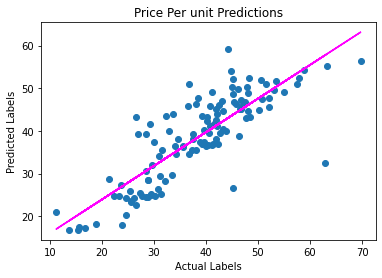

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per unit Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The model has some predictive power

#### Using  saved model to predict  price_per_unit of new residential property



In [68]:
import joblib

# Save the model 
filename = './real_estate_data_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each new transaction 
X_new = np.array([[2012.917,18.2,289.3248,4,26.45238,142.4348],
                  [2013.583,20.6,4082.5424,9,24.94155,161.50221]])

# Use the model to predict price_per_unit
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
48.11
18.41
